### Problem 01 - Forest Fires 
PREDICT THE BURNED AREA OF FOREST FIRES WITH NEURAL NETWORKS


#### 1. Import Necessary Libraries

In [2]:
import tensorflow as tf
tf.__version__

'2.8.0'

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.decomposition import PCA
from keras.models import Sequential
from keras.layers import Flatten,Conv2D,MaxPooling2D,Dense,Dropout
from keras.preprocessing.image import ImageDataGenerator

#### 2. Importing the Data

In [4]:
data_1 = pd.read_csv('forestfires.csv')
data_1

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,small


#### 3. Data Understanding

In [5]:
data_1.shape

(517, 31)

In [6]:
data_1.dtypes

month             object
day               object
FFMC             float64
DMC              float64
DC               float64
ISI              float64
temp             float64
RH                 int64
wind             float64
rain             float64
area             float64
dayfri             int64
daymon             int64
daysat             int64
daysun             int64
daythu             int64
daytue             int64
daywed             int64
monthapr           int64
monthaug           int64
monthdec           int64
monthfeb           int64
monthjan           int64
monthjul           int64
monthjun           int64
monthmar           int64
monthmay           int64
monthnov           int64
monthoct           int64
monthsep           int64
size_category     object
dtype: object

In [7]:
data_1.isnull().sum()

month            0
day              0
FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
area             0
dayfri           0
daymon           0
daysat           0
daysun           0
daythu           0
daytue           0
daywed           0
monthapr         0
monthaug         0
monthdec         0
monthfeb         0
monthjan         0
monthjul         0
monthjun         0
monthmar         0
monthmay         0
monthnov         0
monthoct         0
monthsep         0
size_category    0
dtype: int64

In [8]:
data_1.describe()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,...,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292,0.164410,...,0.017408,0.038685,0.003868,0.061896,0.032882,0.104449,0.003868,0.001934,0.029014,0.332689
std,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818,0.371006,...,0.130913,0.193029,0.062137,0.241199,0.178500,0.306138,0.062137,0.043980,0.168007,0.471632
min,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [9]:
data_1['size_category'].value_counts()

small    378
large    139
Name: size_category, dtype: int64

In [10]:
# from above there only 2 class for forrest fire classification and class small have highest frequency compare to class large.
## data is imbalanced in approx 3 : 1 ratio

In [11]:
data_2 = data_1.drop(labels=['month','day'], axis=1)
data_2 

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,1,...,0,0,0,0,1,0,0,0,0,small
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,0,...,0,0,0,0,0,0,0,1,0,small
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,0,...,0,0,0,0,0,0,0,1,0,small
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,1,...,0,0,0,0,1,0,0,0,0,small
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,0,...,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,0,...,0,0,0,0,0,0,0,0,0,large
513,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,0,...,0,0,0,0,0,0,0,0,0,large
514,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,0,...,0,0,0,0,0,0,0,0,0,large
515,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,0,...,0,0,0,0,0,0,0,0,0,small


In [12]:
data_2_corr = data_2.corr().round(1)

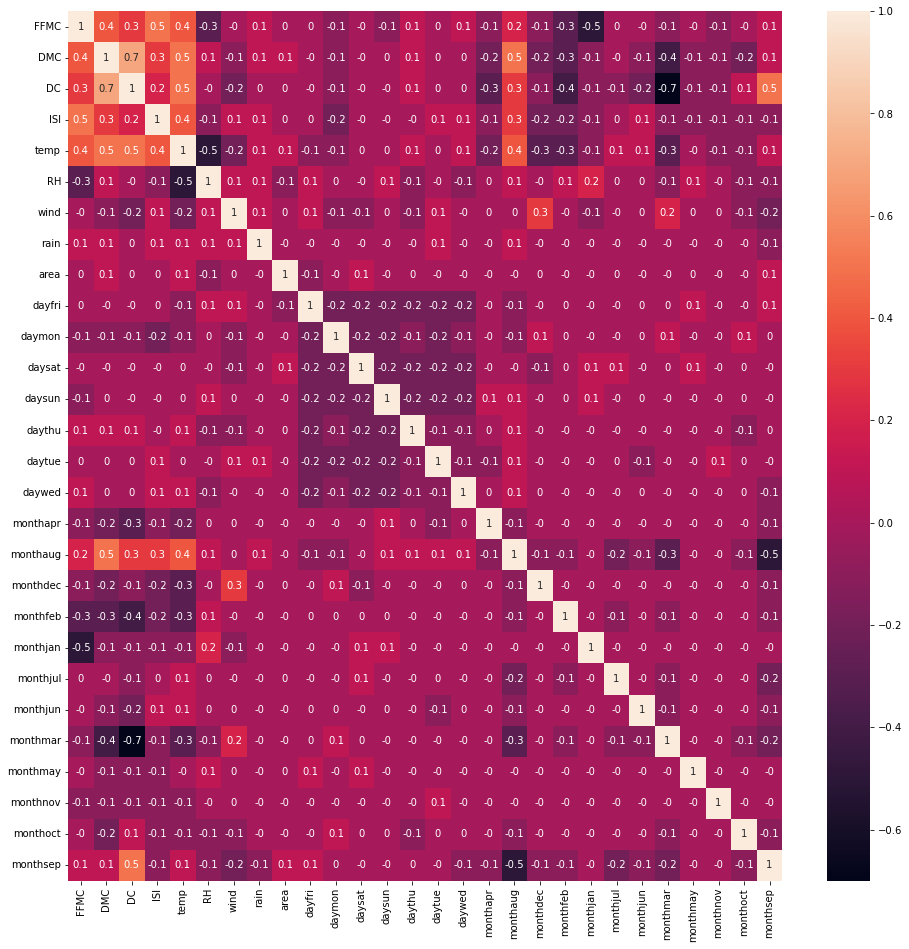

In [13]:
plt.figure(figsize=[16,16])
sns.heatmap(data_2_corr, annot= True)
plt.show()

#### 4.Data Preparation

In [14]:
data_2['size_category'] = data_2['size_category'].replace('small',1)

In [15]:
data_2['size_category'] = data_2['size_category'].replace('large',0)

In [16]:
data_2['size_category']

0      1
1      1
2      1
3      1
4      1
      ..
512    0
513    0
514    0
515    1
516    1
Name: size_category, Length: 517, dtype: int64

In [17]:
mm_scale = MinMaxScaler()

In [18]:
data_2

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,1,...,0,0,0,0,1,0,0,0,0,1
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,0,...,0,0,0,0,0,0,0,1,0,1
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,0,...,0,0,0,0,0,0,0,1,0,1
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,1,...,0,0,0,0,1,0,0,0,0,1
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,0,...,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,0,...,0,0,0,0,0,0,0,0,0,0
513,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,0,...,0,0,0,0,0,0,0,0,0,0
514,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,0,...,0,0,0,0,0,0,0,0,0,0
515,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,0,...,0,0,0,0,0,0,0,0,0,1


In [19]:
data_unscaled = data_2.iloc[:,0:9]
data_unscaled

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00
...,...,...,...,...,...,...,...,...,...
512,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44
513,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29
514,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16
515,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00


In [20]:
mm_scale = mm_scale.fit_transform(data_unscaled)

In [21]:
data_scaled = pd.DataFrame(data = mm_scale,columns=data_unscaled.columns)
data_scaled

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,0.870968,0.086492,0.101325,0.090909,0.192926,0.423529,0.700000,0.00000,0.000000
1,0.927742,0.118194,0.775419,0.119430,0.508039,0.211765,0.055556,0.00000,0.000000
2,0.927742,0.146795,0.796294,0.119430,0.398714,0.211765,0.100000,0.00000,0.000000
3,0.941935,0.110958,0.081623,0.160428,0.196141,0.964706,0.400000,0.03125,0.000000
4,0.910968,0.172984,0.110590,0.171123,0.295820,0.988235,0.155556,0.00000,0.000000
...,...,...,...,...,...,...,...,...,...
512,0.811613,0.191592,0.771315,0.033868,0.823151,0.200000,0.255556,0.00000,0.005904
513,0.811613,0.191592,0.771315,0.033868,0.633441,0.658824,0.600000,0.00000,0.049769
514,0.811613,0.191592,0.771315,0.033868,0.610932,0.647059,0.700000,0.00000,0.010231
515,0.976774,0.499311,0.711622,0.201426,0.752412,0.317647,0.400000,0.00000,0.000000


In [22]:
data_scaled_1 = data_2.iloc[:,9:]
data_scaled_1

,dayfri,daymon,daysat,daysun,daythu,daytue,daywed,monthapr,monthaug,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1
2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
4,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
513,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
514,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
515,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1


In [23]:
data_scaled_full = pd.concat([data_scaled, data_scaled_1] , axis= 1)
data_scaled_full

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,0.870968,0.086492,0.101325,0.090909,0.192926,0.423529,0.700000,0.00000,0.000000,1,...,0,0,0,0,1,0,0,0,0,1
1,0.927742,0.118194,0.775419,0.119430,0.508039,0.211765,0.055556,0.00000,0.000000,0,...,0,0,0,0,0,0,0,1,0,1
2,0.927742,0.146795,0.796294,0.119430,0.398714,0.211765,0.100000,0.00000,0.000000,0,...,0,0,0,0,0,0,0,1,0,1
3,0.941935,0.110958,0.081623,0.160428,0.196141,0.964706,0.400000,0.03125,0.000000,1,...,0,0,0,0,1,0,0,0,0,1
4,0.910968,0.172984,0.110590,0.171123,0.295820,0.988235,0.155556,0.00000,0.000000,0,...,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,0.811613,0.191592,0.771315,0.033868,0.823151,0.200000,0.255556,0.00000,0.005904,0,...,0,0,0,0,0,0,0,0,0,0
513,0.811613,0.191592,0.771315,0.033868,0.633441,0.658824,0.600000,0.00000,0.049769,0,...,0,0,0,0,0,0,0,0,0,0
514,0.811613,0.191592,0.771315,0.033868,0.610932,0.647059,0.700000,0.00000,0.010231,0,...,0,0,0,0,0,0,0,0,0,0
515,0.976774,0.499311,0.711622,0.201426,0.752412,0.317647,0.400000,0.00000,0.000000,0,...,0,0,0,0,0,0,0,0,0,1


In [24]:
X = data_scaled_full.drop(labels = ['size_category'], axis = 1)
y = data_scaled_full[['size_category']]

In [25]:
X.head()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
0,0.870968,0.086492,0.101325,0.090909,0.192926,0.423529,0.700000,0.00000,0.0,1,...,0,0,0,0,0,1,0,0,0,0
1,0.927742,0.118194,0.775419,0.119430,0.508039,0.211765,0.055556,0.00000,0.0,0,...,0,0,0,0,0,0,0,0,1,0
2,0.927742,0.146795,0.796294,0.119430,0.398714,0.211765,0.100000,0.00000,0.0,0,...,0,0,0,0,0,0,0,0,1,0
3,0.941935,0.110958,0.081623,0.160428,0.196141,0.964706,0.400000,0.03125,0.0,1,...,0,0,0,0,0,1,0,0,0,0
4,0.910968,0.172984,0.110590,0.171123,0.295820,0.988235,0.155556,0.00000,0.0,0,...,0,0,0,0,0,1,0,0,0,0


In [26]:
y.head()

,size_category
0,1
1,1
2,1
3,1
4,1


In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y, shuffle=True)

In [28]:
X_train.shape, X_test.shape , y_train.shape , y_test.shape

((413, 28), (104, 28), (413, 1), (104, 1))

#### 5. Model Building
5.1 Building the architecture

In [29]:
model = Sequential()

In [30]:
model.add(Dense(12, input_dim=28, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 12)                348       
                                                                 
 dense_1 (Dense)             (None, 8)                 104       
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 461
Trainable params: 461
Non-trainable params: 0
_________________________________________________________________


In [31]:
model.compile(optimizer='Adam',loss='binary_crossentropy',metrics='accuracy')

#### 6. Model Training

In [32]:
model.fit(x=X_train,y=y_train,batch_size=10,epochs=160)

Epoch 1/160
42/42 [==============================] - 1s 3ms/step - loss: 0.6534 - accuracy: 0.7046
Epoch 2/160
42/42 [==============================] - 0s 3ms/step - loss: 0.6136 - accuracy: 0.7312
Epoch 3/160
42/42 [==============================] - 0s 3ms/step - loss: 0.5909 - accuracy: 0.7312
Epoch 4/160
42/42 [==============================] - 0s 2ms/step - loss: 0.5847 - accuracy: 0.7312
Epoch 5/160
42/42 [==============================] - 0s 2ms/step - loss: 0.5808 - accuracy: 0.7312
Epoch 6/160
42/42 [==============================] - 0s 2ms/step - loss: 0.5774 - accuracy: 0.7312
Epoch 7/160
42/42 [==============================] - 0s 3ms/step - loss: 0.5742 - accuracy: 0.7312
Epoch 8/160
42/42 [==============================] - 0s 3ms/step - loss: 0.5713 - accuracy: 0.7312
Epoch 9/160
42/42 [==============================] - 0s 3ms/step - loss: 0.5682 - accuracy: 0.7312
Epoch 10/160
42/42 [==============================] - 0s 2ms/step - loss: 0.5636 - accuracy: 0.7312
Epoch 11/

42/42 [==============================] - 0s 3ms/step - loss: 0.3640 - accuracy: 0.8475
Epoch 84/160
42/42 [==============================] - 0s 3ms/step - loss: 0.3598 - accuracy: 0.8523
Epoch 85/160
42/42 [==============================] - 0s 3ms/step - loss: 0.3543 - accuracy: 0.8547
Epoch 86/160
42/42 [==============================] - 0s 3ms/step - loss: 0.3495 - accuracy: 0.8668
Epoch 87/160
42/42 [==============================] - 0s 3ms/step - loss: 0.3451 - accuracy: 0.8644
Epoch 88/160
42/42 [==============================] - 0s 3ms/step - loss: 0.3417 - accuracy: 0.8668
Epoch 89/160
42/42 [==============================] - 0s 3ms/step - loss: 0.3393 - accuracy: 0.8692
Epoch 90/160
42/42 [==============================] - 0s 3ms/step - loss: 0.3320 - accuracy: 0.8717
Epoch 91/160
42/42 [==============================] - 0s 3ms/step - loss: 0.3308 - accuracy: 0.8692
Epoch 92/160
42/42 [==============================] - 0s 3ms/step - loss: 0.3305 - accuracy: 0.8644
Epoch 93/160


#### 7. Model Testing and Evaluation

In [33]:
model.evaluate(X_train, y_train)

13/13 [==============================] - 0s 2ms/step - loss: 0.1407 - accuracy: 0.9564


[0.14072327315807343, 0.9564164876937866]

In [69]:
model.evaluate(X_test, y_test)

4/4 [==============================] - 0s 3ms/step - loss: 1.0316 - accuracy: 0.8173


[1.031644582748413, 0.817307710647583]

In [59]:
result_train = model.predict(X_train)

In [60]:
result_train = np.where(result_train > 0.5, 1, 0)
result_train = pd.DataFrame(data = result_train )
result_train

,0
0,1
1,1
2,1
3,1
4,1
...,...
408,1
409,0
410,1
411,1


In [64]:
accuracy_score(y_train, result_train)

0.9564164648910412

In [65]:
result_test = model.predict(X_test)

In [66]:
result_test = np.where(result > 0.5, 1, 0)
result_test = pd.DataFrame(data = result )
result_test

,0
0,1
1,1
2,0
3,1
4,1
...,...
99,1
100,0
101,1
102,0


In [67]:
accuracy_score(y_test, result_test)

0.8173076923076923

#### 8. Model Evaluation